<a href="https://colab.research.google.com/github/JakeOh/202103_itw_pyda_wkd/blob/main/da09_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # DataFrame, Series 기능들
import matplotlib.pyplot as plt  # 그래프 함수들
import seaborn as sns  # 시각화 패키지

In [2]:
# seaborn 패키지의 예제 데이터 셋 로드
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
# 숫자형 데이터 요약(기술 통계)
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# 카테고리(범주) 타입 컬럼 요약 - 빈도수(frequency)
tips['sex'].value_counts()
#> value_counts() 메서드는 범주의 순서와 상관없이 값들의 내림차순으로 출력.

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [8]:
tips[['sex', 'smoker', 'day', 'time']].value_counts()

sex     smoker  day   time  
Male    No      Sun   Dinner    43
                Sat   Dinner    32
        Yes     Sat   Dinner    27
Female  No      Thur  Lunch     24
Male    No      Thur  Lunch     20
        Yes     Sun   Dinner    15
Female  Yes     Sat   Dinner    15
        No      Sun   Dinner    14
                Sat   Dinner    13
Male    Yes     Thur  Lunch     10
Female  Yes     Thur  Lunch      7
Male    Yes     Fri   Dinner     5
Female  Yes     Fri   Dinner     4
                Sun   Dinner     4
                Fri   Lunch      3
Male    Yes     Fri   Lunch      3
        No      Fri   Dinner     2
Female  No      Thur  Dinner     1
                Fri   Lunch      1
                      Dinner     1
dtype: int64

# Histogram(히스토그램)

*   연속형 변수(숫자)를 구간으로 나눠서, 그 구간 안에 포함된 데이터들의 개수를 막대 그래프로 표현.
*   변수의 분포 확인.

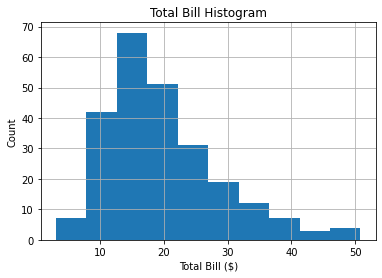

In [9]:
# 영수증 금액(total_bill)의 히스토그램
plt.hist(x=tips['total_bill'])  # 그래프 종류 선택
# 그래프 옵션들
plt.xlabel('Total Bill ($)')
plt.ylabel('Count')
plt.title('Total Bill Histogram')
plt.grid()

plt.show()  # 그래프 출력

# 막대 그래프(bar plot)

*   변수의 값(크기)를 막대로 표현
*   일반적으로 카테고리(범주) 타입의 변수들을 시각화할 때 많이 사용
*   그룹별 통계 값을 표현할 때 사용

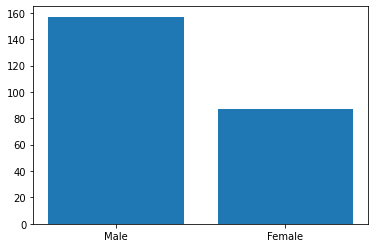

In [10]:
# 성비 그래프
gender_cnt = tips['sex'].value_counts()  # 시각화할 데이터
plt.bar(x=gender_cnt.index, height=gender_cnt.values)  # 그래프 종류
plt.show()  # 그래프 출력

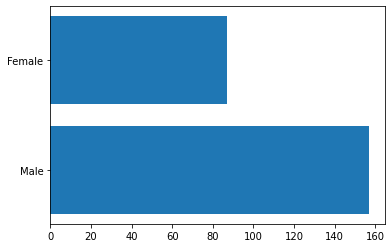

In [11]:
# horizontal bar(가로 막대) 그래프
plt.barh(y=gender_cnt.index, width=gender_cnt.values)
plt.show()

# Box plot(상자 그래프)

*   기술 통계량(최솟값, 25%, 중위값, 75%, 최댓값)을 box와 fence, 점들로 표현한 그래프
*   변수들의 분포 확인

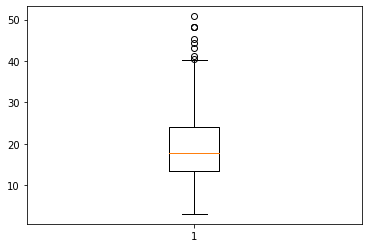

In [12]:
# total_bill의 분포
plt.boxplot(x=tips['total_bill'])
plt.show()

그룹별 통계값(평균)

In [16]:
# 성별 tip의 평균
tip_by_gender = tips.groupby('sex')['tip'].mean()
tip_by_gender

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

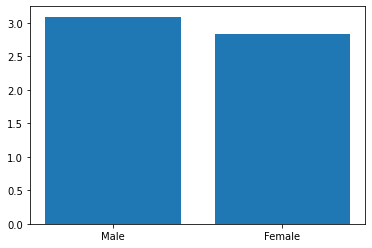

In [18]:
plt.bar(x=tip_by_gender.index, height=tip_by_gender.values)
plt.show()

성별 tip의 분포 - box plot

In [19]:
tips.groupby('sex')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5


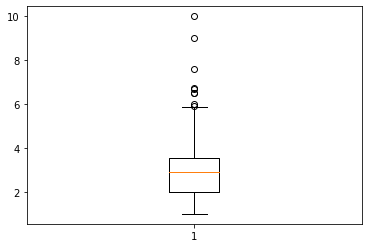

In [20]:
plt.boxplot(x=tips['tip'])
plt.show()

In [ ]:
# 남성 손님들의 tip
tip_male = tips[tips['sex'] == 'Male']['tip']
# print(tip_male)

# 여성 손님들의 tip
tip_female = tips[tips['sex'] == 'Female']['tip']
# print(tip_female)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


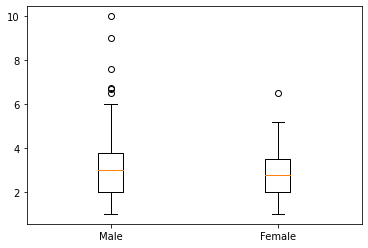

In [25]:
plt.boxplot(x=[tip_male, tip_female], labels=['Male', 'Female'])
plt.show()

# Scatter plot(산점도 그래프)

*   두 변수 간의 상관 관계를 파악할 때 주로 많이 사용됨.

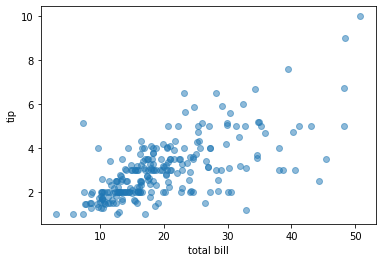

In [32]:
# tip ~ total_bill의 관계(y ~ x, y = ax + b)
plt.scatter(x=tips['total_bill'], y=tips['tip'], alpha=0.5)
# alpha: 투명도(0:투명 ~ 1.0:불투명)
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()

# 선그래프(Line plot)

*   시계열 그래프(주식 가격 변동, 환율 변동, ...)

In [33]:
import numpy as np

In [34]:
df = pd.DataFrame({'x': np.arange(1, 11),
                   'y': np.random.randint(50, 100, 10)})
df

,x,y
0,1,54
1,2,56
2,3,52
3,4,66
4,5,72
5,6,72
6,7,58
7,8,78
8,9,76
9,10,78


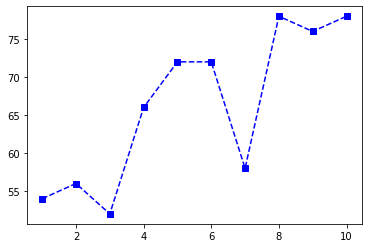

In [37]:
# plt.plot(df['x'], df['y'], 'ro-')
#> 'ro-': color='red', marker='o', linestyle='-'
plt.plot(df['x'], df['y'], color='blue', marker='s', linestyle='--')
plt.show()

# seaborn 패키지

## Histogram

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


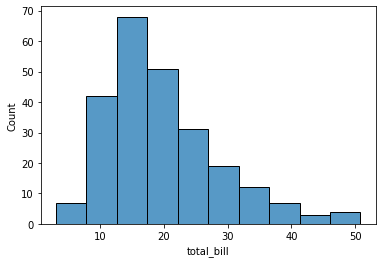

In [40]:
sns.histplot(data=tips, x='total_bill', bins=10)
plt.show()

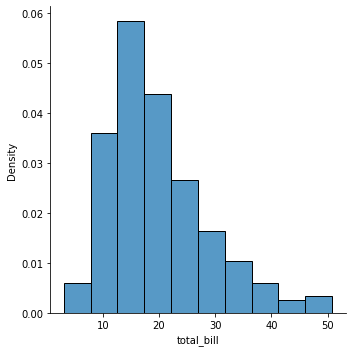

In [42]:
sns.displot(data=tips, x='total_bill', bins=10, stat='density')
plt.show()

## Boxplot

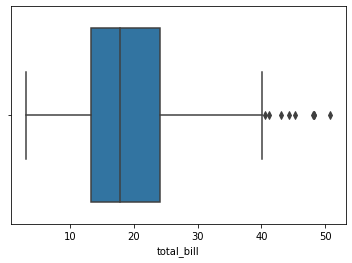

In [45]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

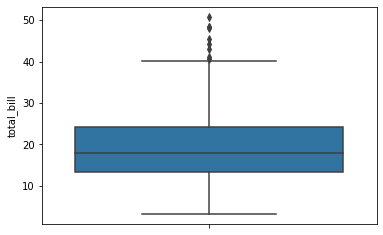

In [43]:
sns.boxplot(data=tips, y='total_bill')
plt.show()

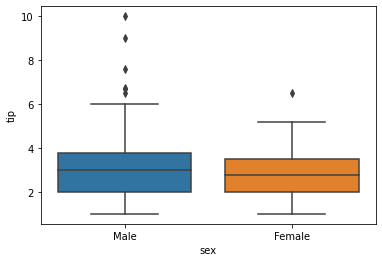

In [46]:
# 성별 tip의 분포
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

In [47]:
# 요일별 tip의 기술 통계량(min, 25%, 50%, 75%, max)
tips.groupby('day')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50


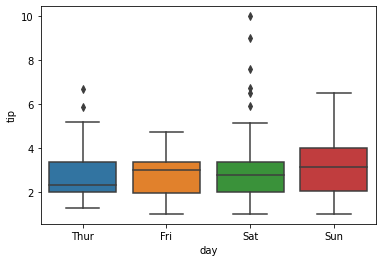

In [48]:
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

## 막대 그래프

### seaborn.countplot

*   카테고리 타입 변수들의 빈도수(count)를 막대로 그린 그래프

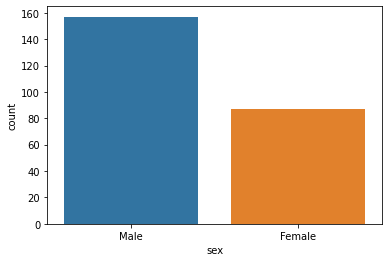

In [50]:
sns.countplot(data=tips, x='sex')
plt.show()

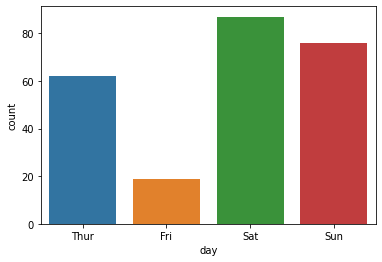

In [51]:
# 요일별 손님 수
sns.countplot(data=tips, x='day')
plt.show()

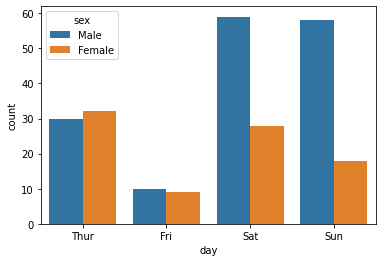

In [52]:
# 요일별 남성/여성 손님수
sns.countplot(data=tips, x='day', hue='sex')
#> hue: 그룹별로 색상을 다르게 표현할 때
plt.show()

In [54]:
tips.groupby(['day', 'sex']).size()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
dtype: int64

### seaborn.barplot

*   그룹별 통계(평균, 최댓값, ...)를 막대로 그린 그래프

In [55]:
# 성별 tip의 평균
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

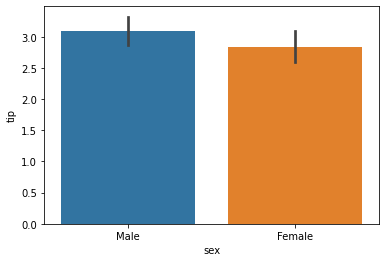

In [56]:
sns.barplot(data=tips, x='sex', y='tip')
plt.show()

In [57]:
# 요일별 tip의 평균
tips.groupby('day')['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

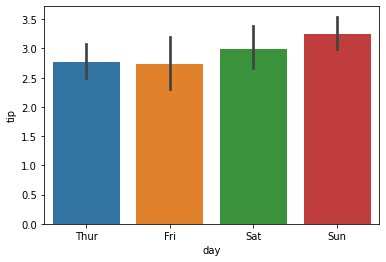

In [58]:
sns.barplot(data=tips, x='day', y='tip')
plt.show()

In [59]:
# 요일별 성별 tip의 평균(성별로 막대 색깔을 다르게)
tips.groupby(['day', 'sex'])['tip'].mean()

day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

In [61]:
tips.pivot_table(values='tip', index='day', columns='sex')

sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


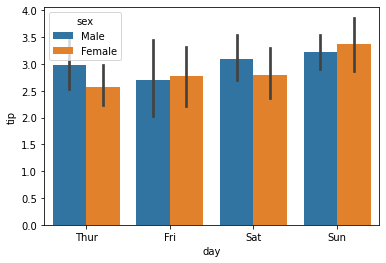

In [62]:
sns.barplot(data=tips, x='day', y='tip', hue='sex')
plt.show()

## Scatter plot

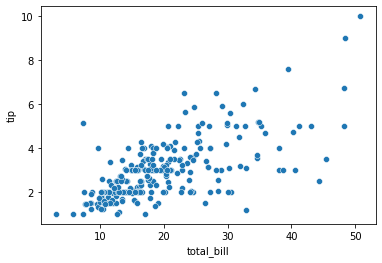

In [63]:
# tip ~ total_bill
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

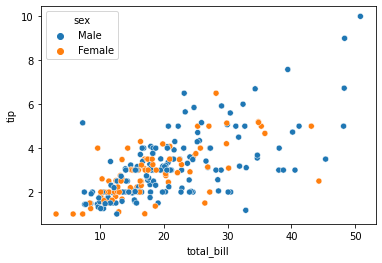

In [66]:
# tip ~ total_bill. marker의 색깔을 성별에 따라서 다르게 표현.
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

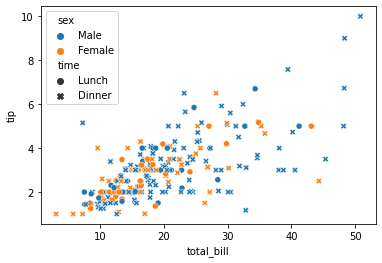

In [67]:
# tip ~ total_bill 
# marker의 색깔을 성별에 따라서 다르게 표현.
# marker의 모양을 시간에 따라서 다르게 표현.
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='sex', style='time')
plt.show()

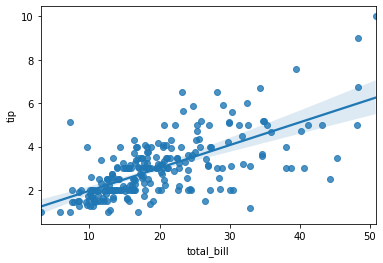

In [68]:
# scatter plot + regression(회귀) 선
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

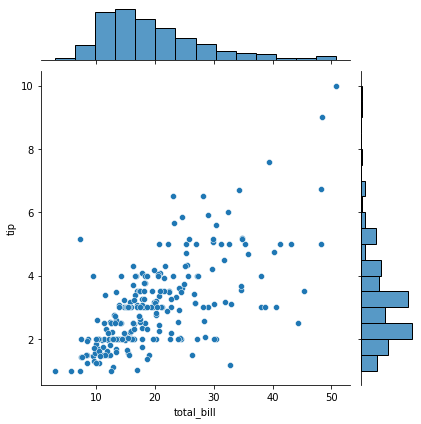

In [69]:
# scatter + histogram
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

## Line plot

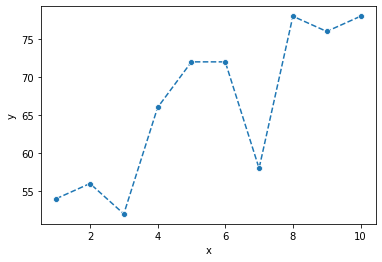

In [73]:
sns.lineplot(data=df, x='x', y='y', marker='o', linestyle='--')
plt.show()

## Category plot

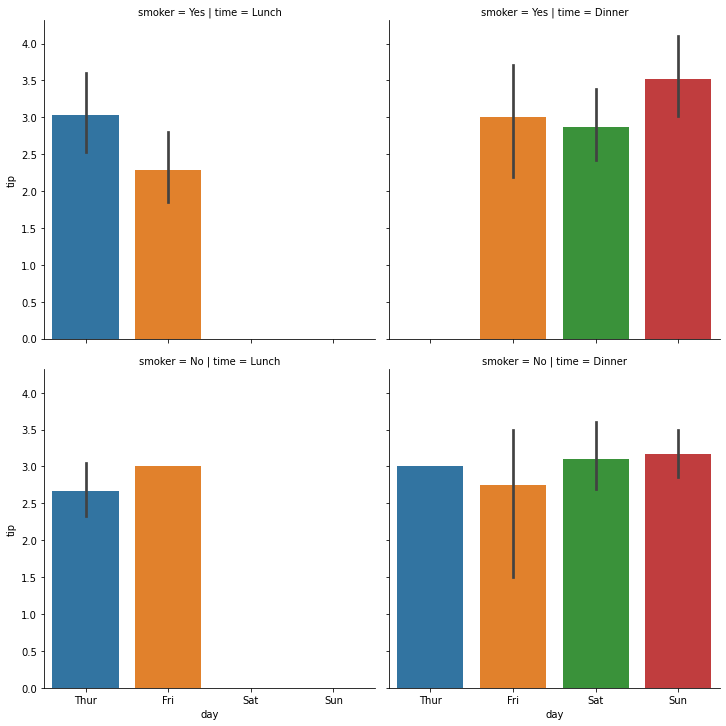

In [76]:
# 요일별(x축) tip의 평균(y축) 막대 그래프
# 흡연여부별(row)로 subplot을 생성.
# 시간별(column)로 subplot을 생성.
sns.catplot(data=tips, x='day', y='tip', kind='bar',
            row='smoker', col='time')
plt.show()